In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import itertools
%matplotlib inline

plt.style.use('seaborn-colorblind')
bboxprops = {'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7}

In [2]:
## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

In [42]:
def EvaluateQuestionSupport(inQuestion,
                     outQuestion,
                     supportStrings = ['Very strongly supported',
                                       'Strongly supported',
                                       'Somewhat supported',
                                       'Not supported',
                                       'I dont know']):
    
    N = len(supportStrings)

    counts = 0
    supportList = []
    NteachComp = []
    NnoTeachComp = []
    PteachComp = []
    PnoTeachComp = []

    for supportString in supportStrings:

        supportList.append(df[inQuestion].loc[df[inQuestion] == supportString].shape[0])

        indexFrame = df[inQuestion].loc[df[inQuestion] == supportString]
        indexFrame = indexFrame.reset_index()

        counts = df[outQuestion][indexFrame['index']].value_counts()
        keys = counts.keys()
        #print(inQuestion, outQuestion, supportString)
        #print(counts.keys())
        
        
        if len(counts) == 0:
            
            NteachComp.append(0)
            NnoTeachComp.append(0)
            PteachComp.append(0)
            PnoTeachComp.append(0)
        
        elif (0 in keys) & (1 in keys):
            
            #print('Normal function')
            NteachComp.append(counts[1])
            NnoTeachComp.append(counts[0])
            PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
            PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)
            
        elif (1 in keys):
            
            #print('No count is zero')
            NteachComp.append(counts[1])
            NnoTeachComp.append(0)
            PteachComp.append(100)
            PnoTeachComp.append(0)
            
        elif (0 in keys):
            
            #print('Yes count is zero')
            NteachComp.append(0)
            NnoTeachComp.append(counts[0])
            PteachComp.append(0)
            PnoTeachComp.append(100)
            
        else:
            
            #print('Both counts are zero')
            NteachComp.append(0)
            NnoTeachComp.append(0)
            PteachComp.append(0)
            PnoTeachComp.append(0)
    
    return supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp

def GraphSupport(supportList, 
                 NteachComp, 
                 NnoTeachComp, 
                 PteachComp, 
                 PnoTeachComp, 
                 xStrings = ['Very strongly\nsupported',
                             'Strongly\nsupported',
                             'Somewhat\nsupported',
                             'Not\nsupported',
                             'I don\'t\nknow'],
                graphTitle='None'):
    
    N = len(xStrings)
    fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
    ax1 = fig1.add_subplot(111)

    for i in np.arange(0,N):
    
        plt.bar(i,supportList[i]/sum(supportList)*100)

    plt.ylabel('% of Respondents')
    plt.xticks(np.arange(0,N),
               xStrings,
               rotation=45);

    plt.axis([-.5,N-0.5,0,50]);
    plt.title(graphTitle)

    N1string = 'N = ' + str(sum(supportList));
    ax1.text(0, 42, N1string, bbox = bboxprops)

    fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
    ax2 = fig2.add_subplot(111)

    ind = np.arange(0,N)

    p1 = plt.bar(ind, PteachComp)
    p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
    plt.ylabel('% of Respondents')
    plt.xticks(np.arange(0,N),
               xStrings,
               rotation=45);

    plt.legend(['Yes','No'],loc=1)
    plt.title(graphTitle)
    plt.axis([-.5,N-0.5,0,100]);
    
    for i in np.arange(0,N):
        ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
                 bbox = bboxprops, fontsize='smaller',rotation=90)

def XSquareTest(NteachComp,NnoTeachComp,alpha=0.05):
    
    if (0 in NteachComp) & (0 in NnoTeachComp):
        
#        print('There are two zeros')
        indicesY = [i for i, x in enumerate(NteachComp) if x == 0]
        indicesN = [i for i, x in enumerate(NnoTeachComp) if x == 0]
        
#         print(NteachComp)
#         print(NnoTeachComp)
        
        for val in indicesY:
            
            if val in indicesN:
                
                del NteachComp[val]
                del NnoTeachComp[val]
                
        obs = [NteachComp,NnoTeachComp]
#         print(obs)
        
    else:
        
        obs = [NteachComp,NnoTeachComp]


    g, p, dof, expctd = chi2_contingency(obs)

    if p < alpha:
        print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
    else:
        print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')

There is NO association between the variables (Xsq:  9.38524811517 , and p:  0.0521593018775 )


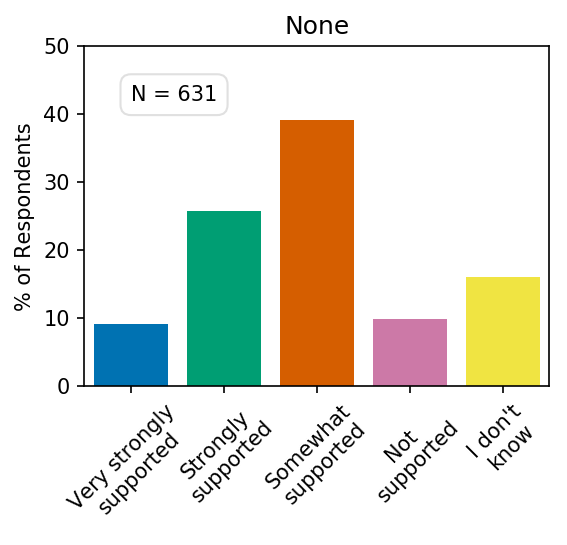

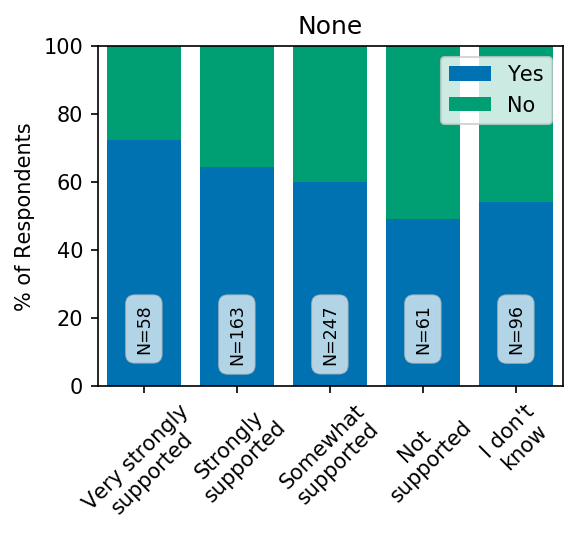

In [4]:
supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport('Q62','Q8')
GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp)
XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)

There is NO association between the variables (Xsq:  9.38524811517 , and p:  0.0521593018775 )
There is an association between the variables (Xsq:  14.6880408725 , p:  0.00539396108203 )
There is an association between the variables (Xsq:  20.7155300279 , p:  0.00036055596819 )
There is an association between the variables (Xsq:  44.6583141419 , p:  4.68240899818e-09 )
There is an association between the variables (Xsq:  10.4903928966 , p:  0.0329295829199 )
There is an association between the variables (Xsq:  37.1002956734 , p:  1.71760462901e-07 )


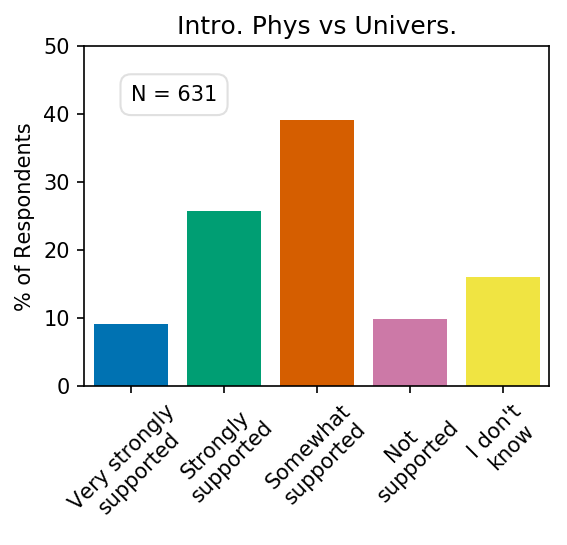

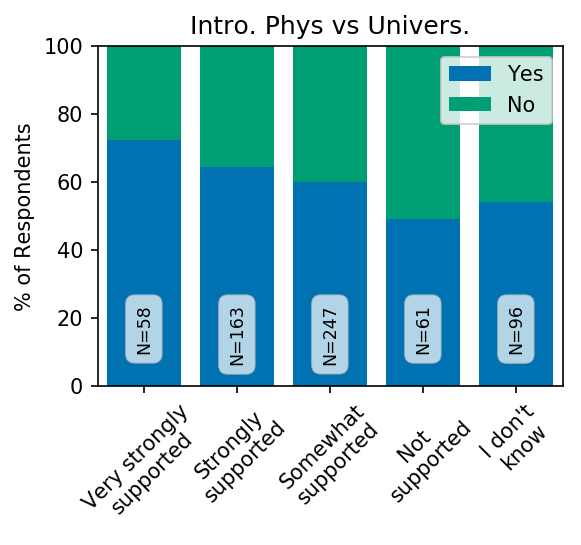

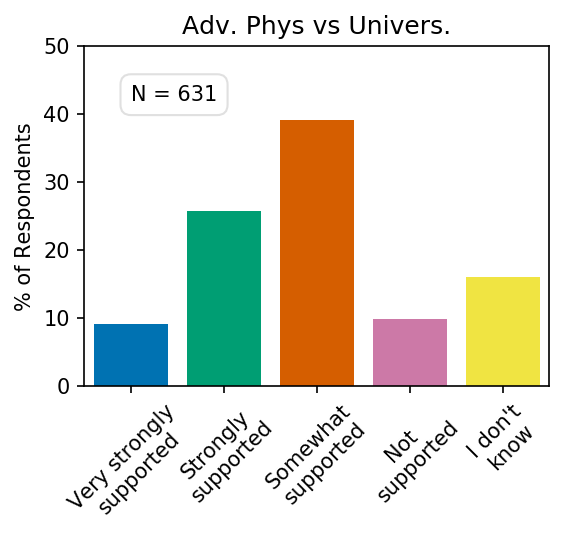

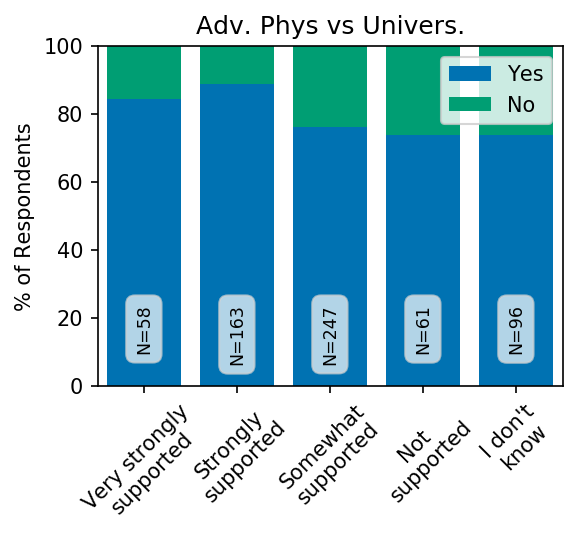

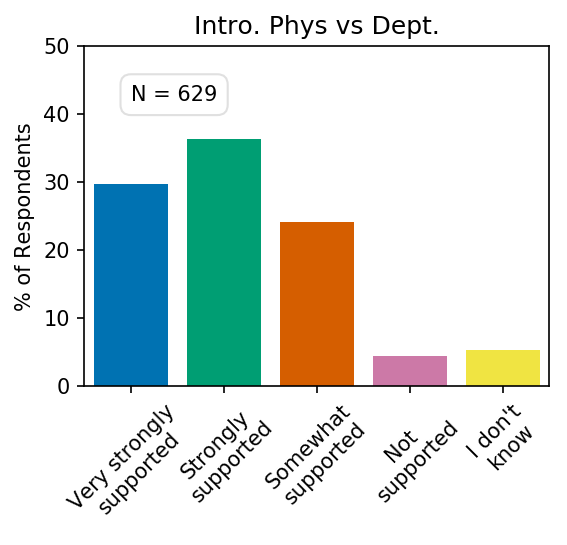

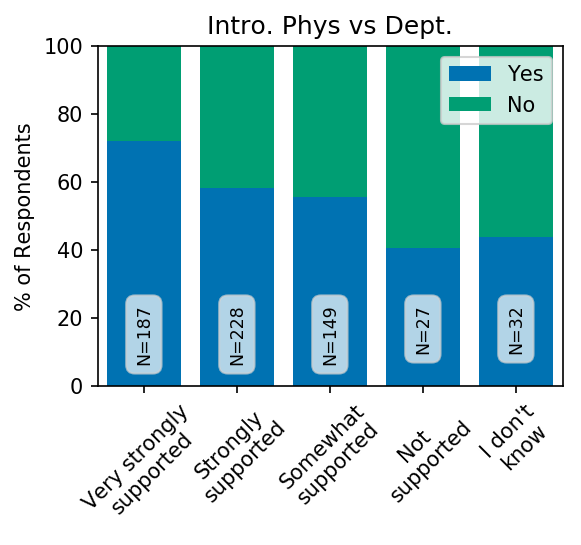

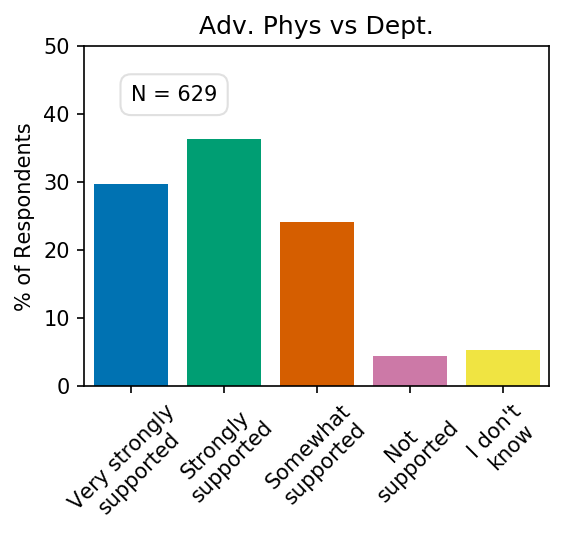

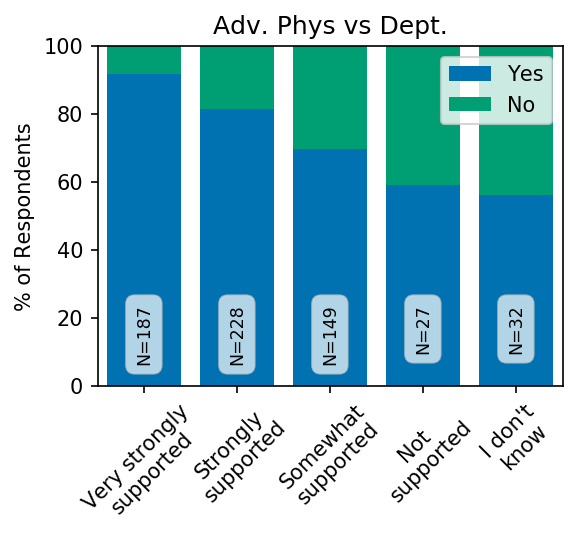

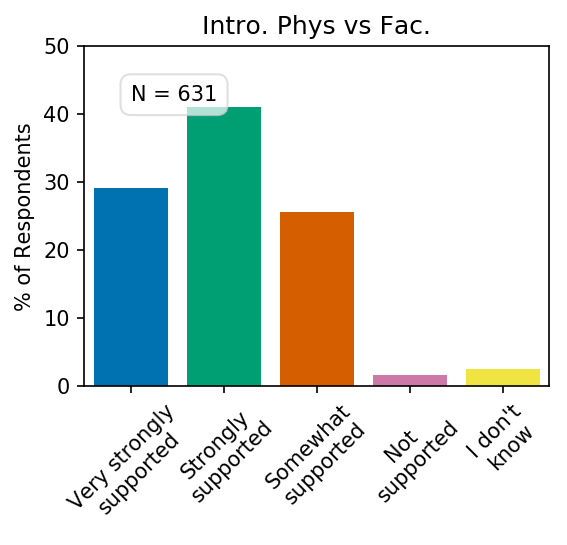

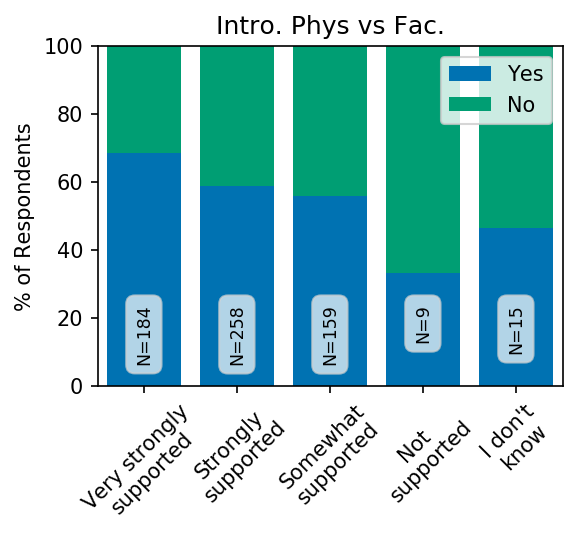

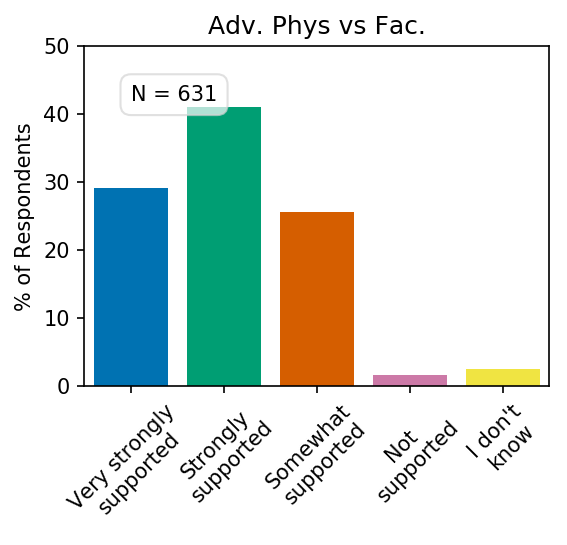

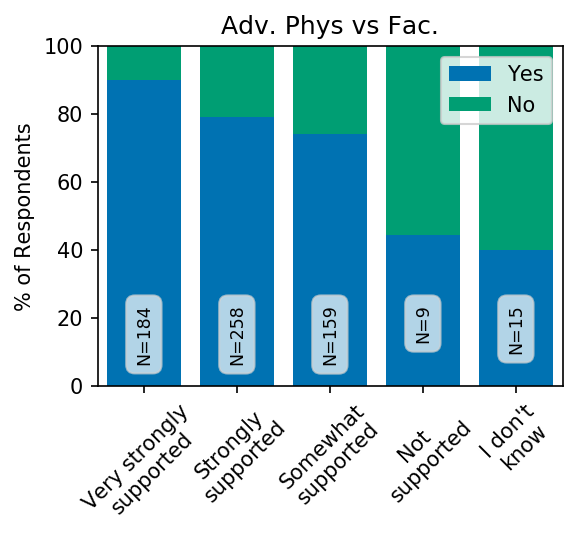

In [5]:
inQuestions = ['Q62','Q63','Q64']
outQuestions = ['Q8','Q11']

combos = list(itertools.product(inQuestions, outQuestions))
titles = ['Intro. Phys vs Univers.',
         'Adv. Phys vs Univers.',
         'Intro. Phys vs Dept.',
         'Adv. Phys vs Dept.',
         'Intro. Phys vs Fac.',
         'Adv. Phys vs Fac.']

i = 0
for combo in combos:
    
    supportList = []
    NteachComp  = []
    NnoTeachComp  = []
    PteachComp  = []
    PnoTeachComp = []
    
    supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport(combo[0],combo[1])
    GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp,graphTitle=titles[i])
    XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)
    i+=1

There is NO association between the variables (Xsq:  6.15564164224 , and p:  0.187822466796 )
There is NO association between the variables (Xsq:  7.27131802628 , and p:  0.122226347929 )
There is NO association between the variables (Xsq:  3.11793973818 , and p:  0.538286094248 )
There is NO association between the variables (Xsq:  6.60371620297 , and p:  0.158371608411 )
There is NO association between the variables (Xsq:  1.78459510723 , and p:  0.775299536185 )
There is NO association between the variables (Xsq:  6.25905657981 , and p:  0.18061906027 )
There is NO association between the variables (Xsq:  0.60251611674 , and p:  0.96278367916 )
There is NO association between the variables (Xsq:  1.97833994549 , and p:  0.739742948411 )


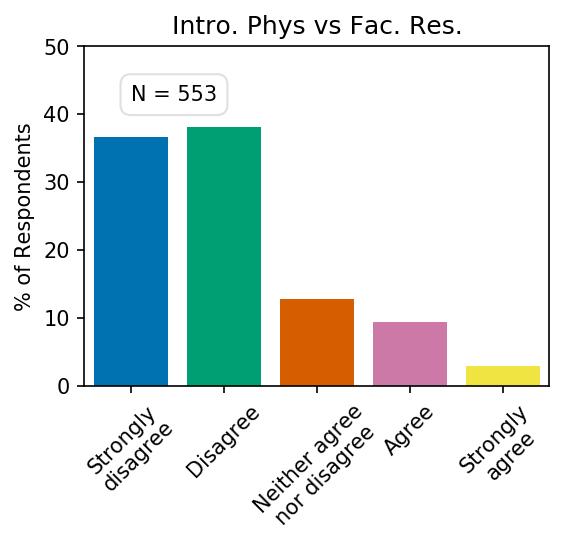

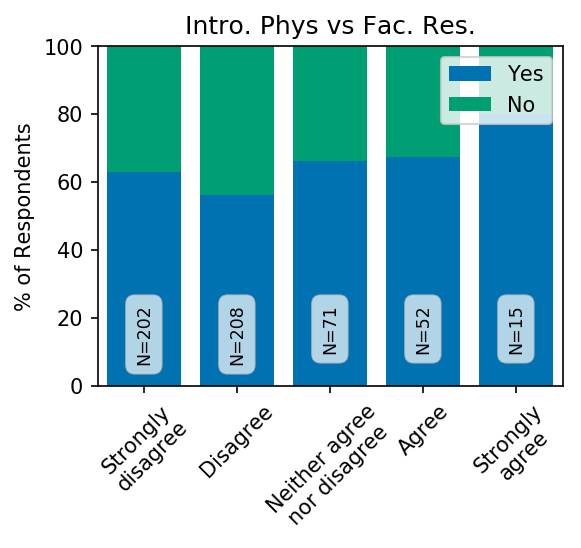

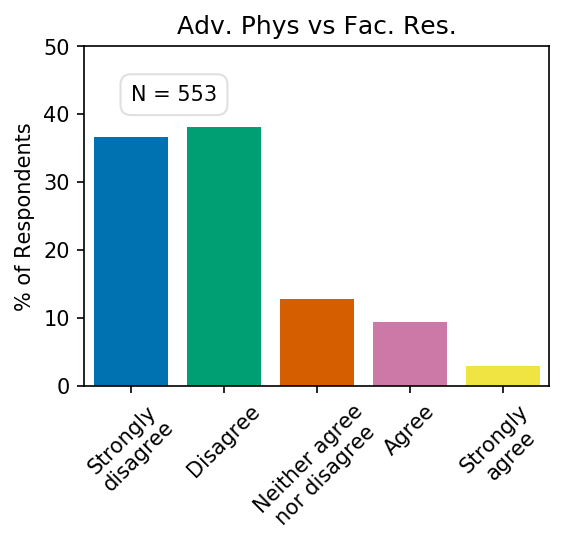

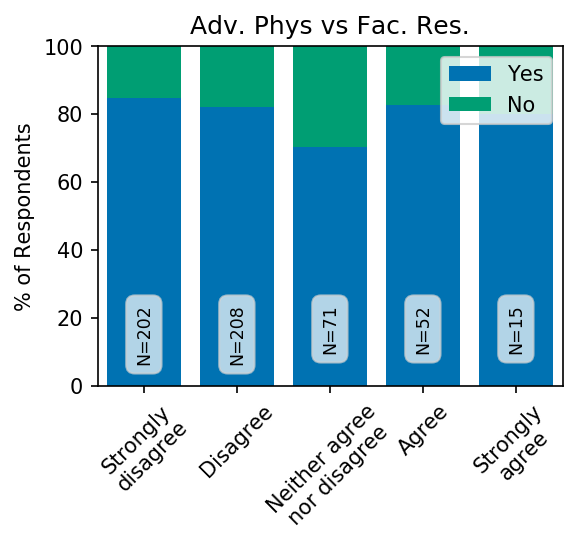

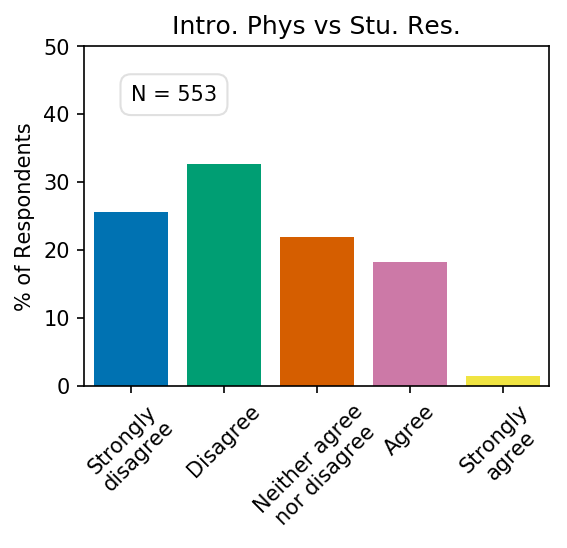

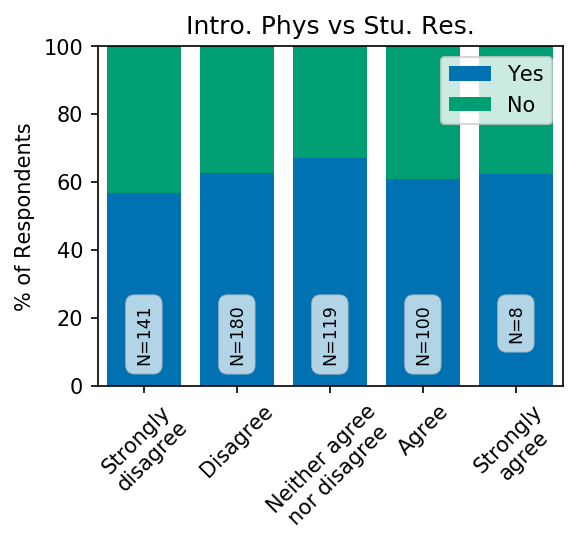

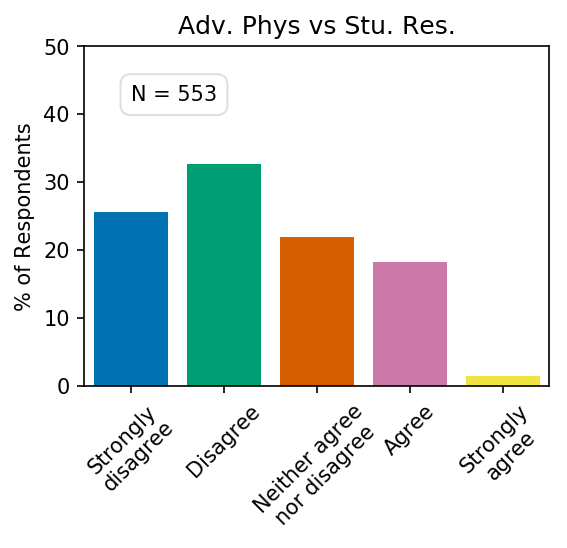

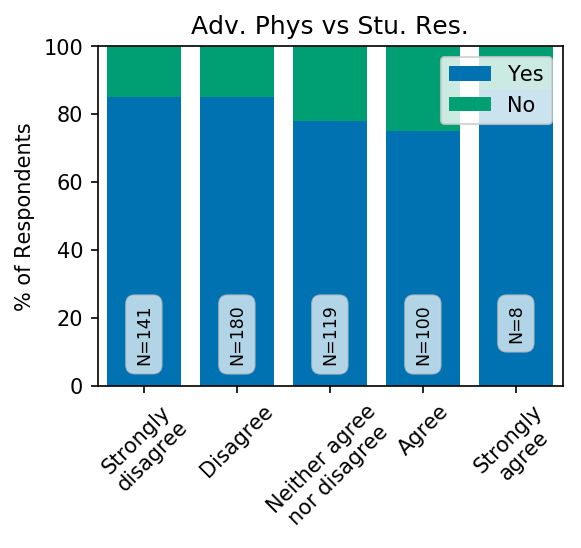

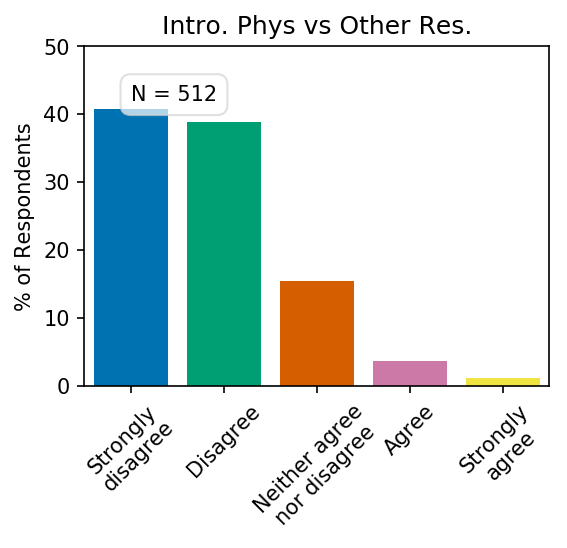

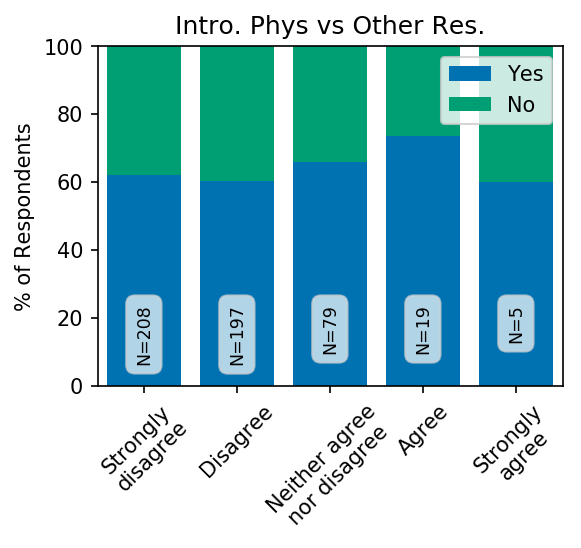

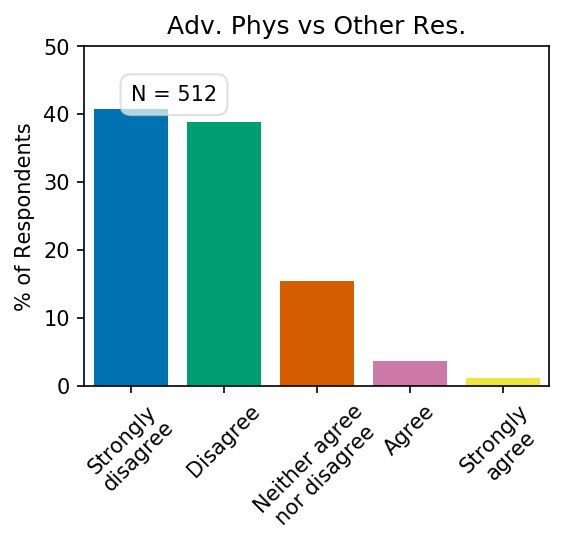

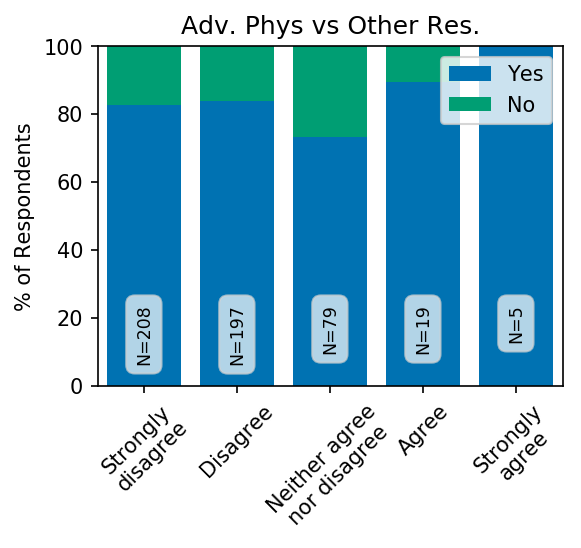

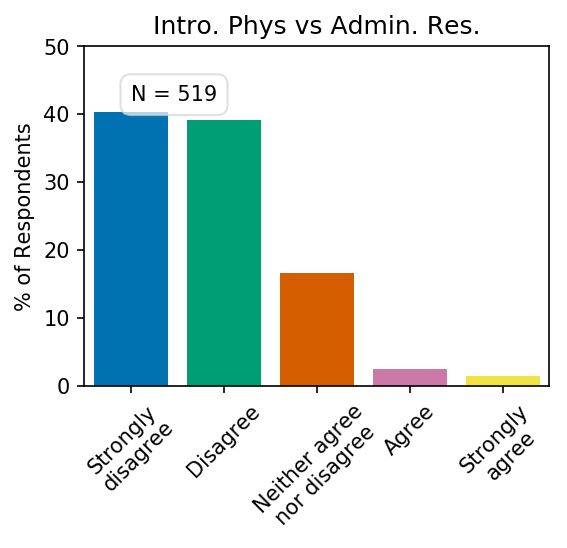

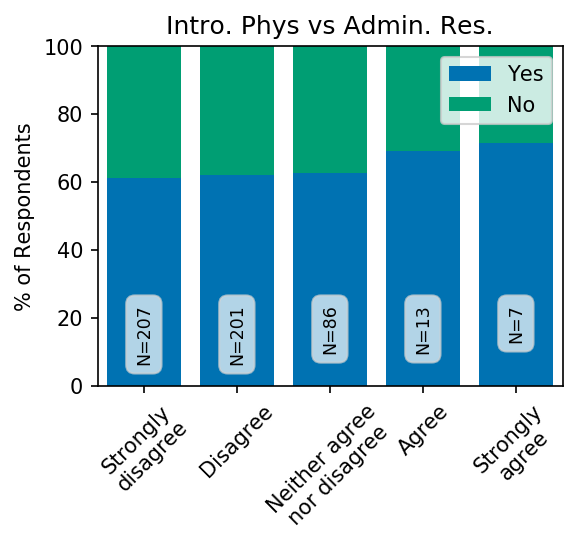

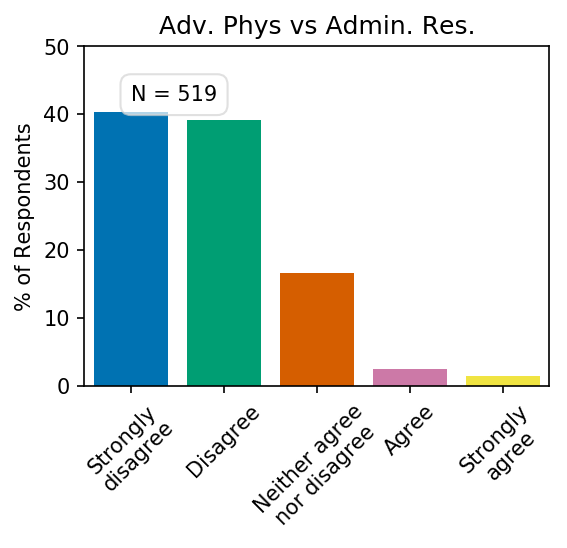

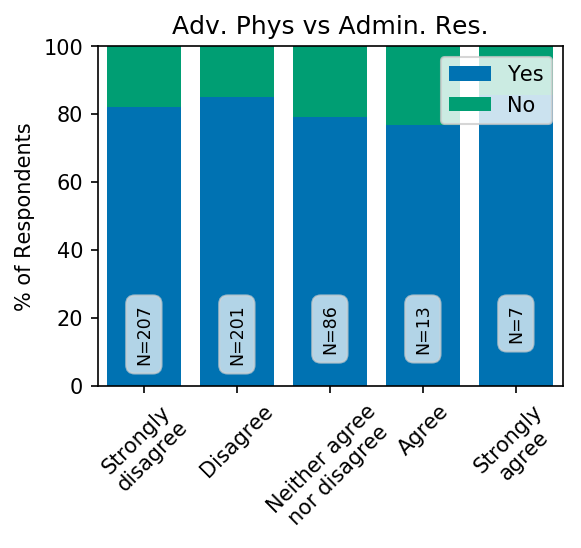

In [6]:
inQuestions = ['Q103','Q104','Q105','Q106']
outQuestions = ['Q8','Q11']

combos = list(itertools.product(inQuestions, outQuestions))
titles = ['Intro. Phys vs Fac. Res.',
          'Adv. Phys vs Fac. Res.',
          'Intro. Phys vs Stu. Res.',
          'Adv. Phys vs Stu. Res.',
          'Intro. Phys vs Other Res.',
          'Adv. Phys vs Other Res.',
          'Intro. Phys vs Admin. Res.',
          'Adv. Phys vs Admin. Res.']

i = 0
for combo in combos:
    
    supportList = []
    NteachComp  = []
    NnoTeachComp  = []
    PteachComp  = []
    PnoTeachComp = []
    
    supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport(combo[0], combo[1],
                                                                                              supportStrings = ['Strongly disagree',
                                                                                                                'Disagree',
                                                                                                                'Neither agree nor disagree',
                                                                                                                'Agree',
                                                                                                                'Strongly agree'])
    GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp, graphTitle = titles[i],xStrings = ['Strongly\ndisagree','Disagree','Neither agree\nnor disagree','Agree','Strongly\nagree'])
    
    XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)
    i+=1

In [43]:
inQuestions = []

for i in range(124,139):
    inQuestions.append('Q'+str(i))

outQuestions = ['Q8','Q11']

combos = list(itertools.product(inQuestions, outQuestions))
# titles = ['Intro. Phys vs Fac. Res.',
#           'Adv. Phys vs Fac. Res.',
#           'Intro. Phys vs Stu. Res.',
#           'Adv. Phys vs Stu. Res.',
#           'Intro. Phys vs Other Res.',
#           'Adv. Phys vs Other Res.',
#           'Intro. Phys vs Admin. Res.',
#           'Adv. Phys vs Admin. Res.']

i = 0
for combo in combos:
    
    supportList = []
    NteachComp  = []
    NnoTeachComp  = []
    PteachComp  = []
    PnoTeachComp = []
    
    supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport(combo[0], combo[1],
                                                                                              supportStrings = ['Strongly disagree',
                                                                                                                'Disagree',
                                                                                                                'Neither agree nor disagree',
                                                                                                                'Agree',
                                                                                                                'Strongly agree'])
    #GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp, xStrings = ['Strongly\ndisagree','Disagree','Neither agree\nnor disagree','Agree','Strongly\nagree'])
    
    XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)
    i+=1

There are two zeros
There is NO association between the variables (Xsq:  6.92089649488 , and p:  0.0744622674836 )
There are two zeros
There is an association between the variables (Xsq:  19.716877891 , p:  0.000194288185906 )
There are two zeros
There is NO association between the variables (Xsq:  6.75880405575 , and p:  0.0799960624563 )
There are two zeros
There is an association between the variables (Xsq:  22.5493475309 , p:  5.01296897594e-05 )
There is an association between the variables (Xsq:  20.2172370268 , p:  0.000452421059717 )
There is an association between the variables (Xsq:  46.6019508601 , p:  1.84560455807e-09 )
There is NO association between the variables (Xsq:  7.39685563529 , and p:  0.116344475538 )
There is NO association between the variables (Xsq:  1.98923319198 , and p:  0.73773931641 )
There is NO association between the variables (Xsq:  4.43725831884 , and p:  0.350051981345 )
There is NO association between the variables (Xsq:  8.39811670939 , and p:  0